<a href="https://colab.research.google.com/github/MrAdithya21/ML-Revisit-Journey/blob/main/Day_2_%E2%80%93_Part_2_Hands_On_Regression_Project_using_the_California_Housing_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2 – Part 2: Hands-On Regression Project using the California Housing Dataset.

### ✅ Step 1: Imports & Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Step 2: Load Dataset

In [ ]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Preview the data
print(df.shape)
df.head()


(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 3: Preprocess & Split

In [ ]:
# Separate features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 4: Train & Compare Models

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append((name, mae, rmse, r2))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])
results_df.sort_values("R2 Score", ascending=False)

,Model,MAE,RMSE,R2 Score
3,Random Forest,0.327425,0.505143,0.805275
1,Ridge Regression,0.533193,0.745557,0.575816
0,Linear Regression,0.533200,0.745581,0.575788
2,Lasso Regression,0.622201,0.824396,0.481361


###  Step 5: Visualize Feature Importance (Random Forest)

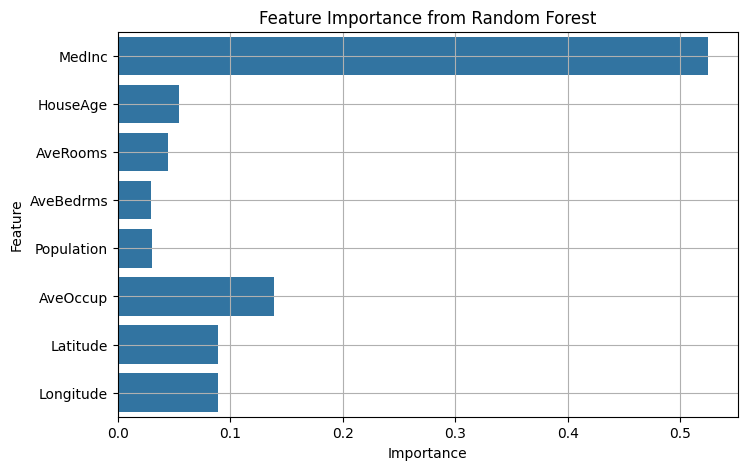

In [ ]:
# Fit RF again to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
